In [ ]:
%matplotlib inline

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import pandas as  pd

import random
import os


In [2]:
class config:
    seed = 42

In [3]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

In [4]:
seed_everything(config.seed)

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
batch_size = 1

In [9]:
### transform 설정
normalize = transforms.Normalize(mean=[x/255.0 for x in [125.3, 123.0, 113.9]],std=[x/255.0 for x in [63.0, 62.1, 66.7]])

transform0 = transforms.Compose([                transforms.ToTensor(),normalize,])

transform_array = []
#transform_array.append(transform0)
for i in [0,1]:
    for j in [0,5,15]:
        for k in [0,0.1,0.2,0.3,0.4]:
            transform1  = transforms.Compose([transforms.RandomHorizontalFlip(p = i),transforms.RandomRotation(degrees = j),transforms.RandomAffine(degrees = 0, translate =(k,k)),  transforms.ToTensor(), normalize, ])  
            transform_array.append(transform1)



In [10]:
trainset0 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform0) 
trainloader0 = torch.utils.data.DataLoader(trainset0, batch_size=batch_size, shuffle=False, num_workers=2)

trainset_array = []
trainloader_array = []

#trainset_array.append(trainset0)
#trainloader_array.append(trainloader0)

for i in range(len(transform_array)):
    trainset1 = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform_array[i]) 
    trainloader1 = torch.utils.data.DataLoader(trainset1, batch_size=batch_size, shuffle=False, num_workers=2) 

    trainset_array.append(trainset1)
    trainloader_array.append(trainloader1)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [11]:
trainset1

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=1)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               RandomAffine(degrees=[0.0, 0.0], translate=(0.4, 0.4))
               ToTensor()
               Normalize(mean=[0.4913725490196078, 0.4823529411764706, 0.4466666666666667], std=[0.24705882352941178, 0.24352941176470588, 0.2615686274509804])
           )

In [12]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


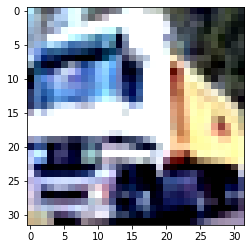

truck


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


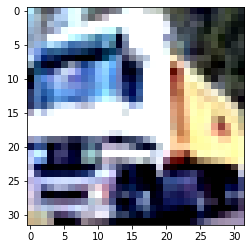

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


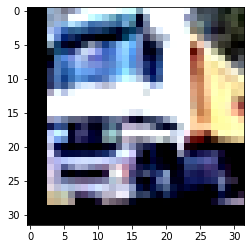

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


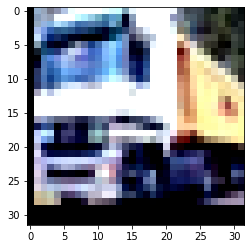

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


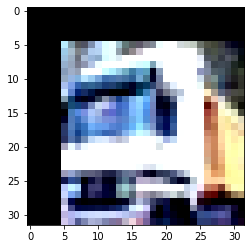

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


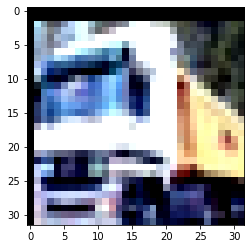

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


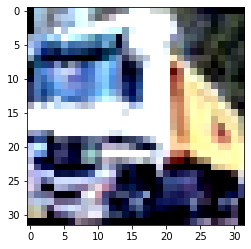

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


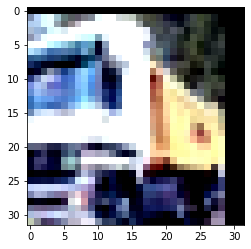

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


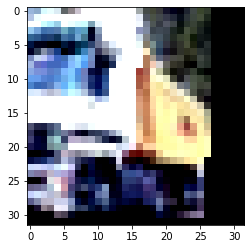

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


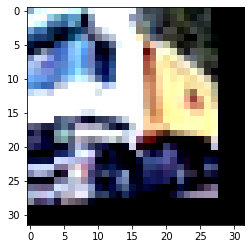

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


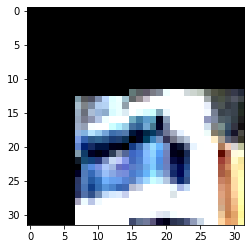

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


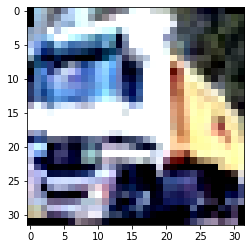

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


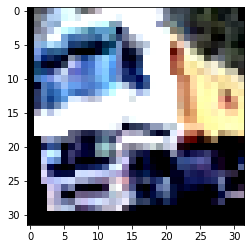

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


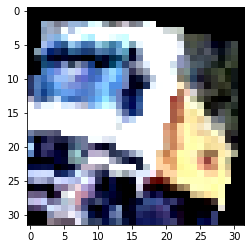

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


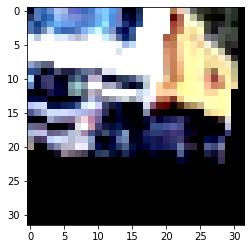

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


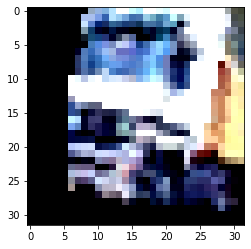

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


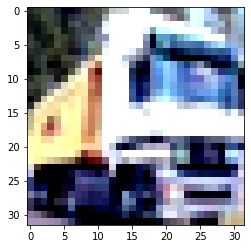

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


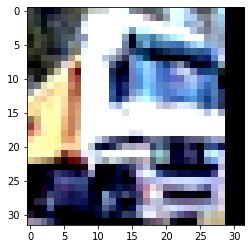

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


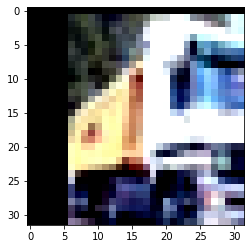

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


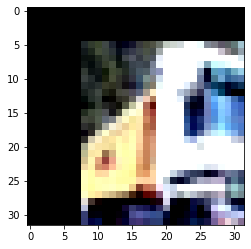

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


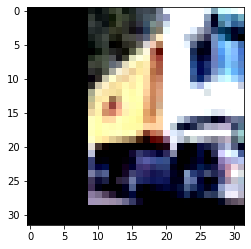

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


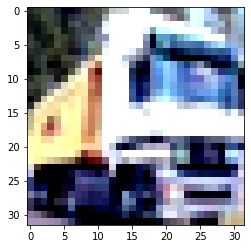

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


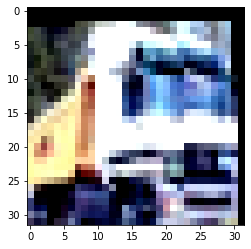

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


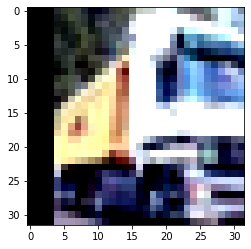

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


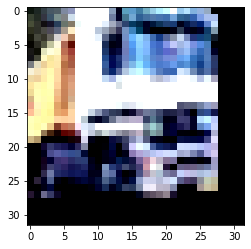

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


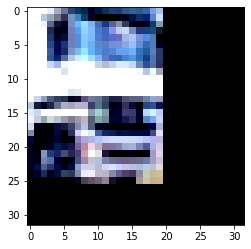

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


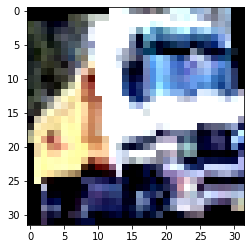

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


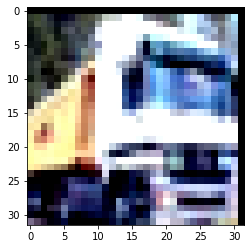

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


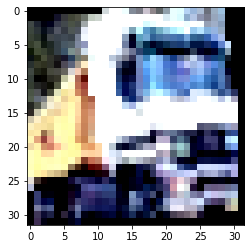

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


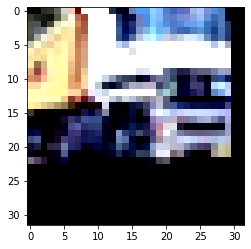

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


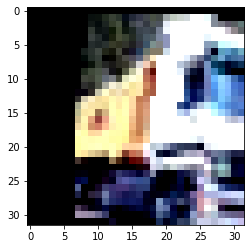

In [15]:
# get some random training images
dataiter0 = iter(trainloader0)
images0, labels0 = dataiter0.next()
images0, labels0 = dataiter0.next()

# show images
imshow(torchvision.utils.make_grid(images0))
# print labels
print(' '.join('%5s' % classes[labels0[j]] for j in range(batch_size)))
#####################################################################################

for i in range(len(transform_array)):
    dataiter1 = iter(trainloader_array[i])
    images1, labels1 = dataiter1.next()
    images1, labels1 = dataiter1.next()
    imshow(torchvision.utils.make_grid(images1))    


In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

In [ ]:
def hist_save(hist_array,dataloader) :
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        hsv = cv2.cvtColor(np.transpose(inputs[0], (1,2,0)).numpy(), cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
        cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
        hist_array.append(hist)
        if i == 499 :
            break  

In [ ]:
hist_array = []

hist_0 = [] 
hist_save(hist_0,trainloader0)


hist_elements_array = []   
for i in range(len(transform_array)):
    hist_elements_array = []    
    hist_save(hist_elements_array,trainloader_array[i])
    hist_array.append(hist_elements_array)

In [ ]:
def hist_sim(hist_1,hist_2):
    ret_total = 0
    for i in range(500):
        ret = cv2.compareHist(hist_1[i], hist_2[i], cv2.HISTCMP_CORREL)
        ret_total = ret_total+ret
    print(ret_total/500)   

In [ ]:
for i in range(len(transform_array)):
    print(i)
    hist_sim(hist_0,hist_array[i])

0
0.7675298214271878
1
0.48347322686174976
2
0.34850106998765984


In [ ]:
methods = {'CORREL' :cv2.HISTCMP_CORREL,                # cv2.HISTCMP_CORREL: 상관관계 (1: 완전 일치, -1: 완전 불일치, 0: 무관계)
        'CHISQR':cv2.HISTCMP_CHISQR,                 # cv2.HISTCMP_CHISQR: 카이제곱 (0: 완전 일치, 무한대: 완전 불일치)
        'INTERSECT':cv2.HISTCMP_INTERSECT,           # cv2.HISTCMP_INTERSECT: 교차 (1: 완전 일치, 0: 완전 불일치 - 1로 정규화한 경우)
        'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}   # cv2.HISTCMP_BHATTACHARYYA 값이 작을수록 유사한 것으로 판단
all_compare = []
for l in range(len(hists)):
 query = hists[l]
 part_compare = []
 for j, (name, flag) in enumerate(methods.items()):
     print('%-10s'%name, end='\t')
     feat_compare = []
     for i, (hist, img) in enumerate(zip(hists, imgs)):
         #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
         ret = cv2.compareHist(query, hist, flag)
         if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우
             ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
         print("img%d_%d:%7.2f"% (l,i+1 , ret), end='\t')
         feat_compare.append(ret)
     part_compare.append(feat_compare)
     print()

 all_compare.append(part_compare)

NameError: ignored